<a href="https://colab.research.google.com/github/alyssability/BootstrapStatistics/blob/main/BootstrapStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

#The Bootstraping Algorithm for Statistical Inference

##Introduction
We live in the most data-driven era in history. The websites we scroll through, coffee shops we visit, even our voter registrations are bits of data that are being collected daily; however, none of these data sets are perfect. Typically, data analysis involves making informed estimations of population characteristics using a sample of the population of interest. Sometimes these sample sizes are very small relative to the population and with a high degree of variance.

Throughout this notebook we will establish various datasets with small sample sizes and high variance to compute the bootstrap statistic estimating a desired population parameter. 

## Define the Bootstrapping Algorithm
Bootstrapping, as a method of statistical inference, is rising to influence because of recent growth in computational power. It is a representation of the gains that can be made through weaving together innovative software development and data analysis.

The bootstrap algorithm can be generalized for estimating the unknown, normal population parameter $\theta$:
1.   Randomly choose a sample $X = x_1, x_2, …, x_n$ from the population without replacement.
2.   Select $B$ independent bootstrap samples $X^1, X^2, …, X^B$ of size $n$ randomly and with replacement from the randomly chosen sample in (1).
3.   Compute the bootstrap statistic for each bootstrap sample, $\theta^b = g(X^b)$ where $b = 1, 2, …, B$
4.   Evaluate the bootstrap statistics using the desired method such as confidence intervals or a hypothesis test.







## Define FindBootMean() Method

Declare a method that accepts Sample Data and returns:
 *   Mean of all Bootstrapped Sample's Means
 *   Mean of all Bootstrapped Sample's Standard Deviations
 *   A list of all BootSamples
 *   A list of each BootSample's Mean


In [ ]:
def FindBootMean(SampleData,trials=500):
  SampleSize = len(SampleData)
  BootInventory = []
  AllMeans = []
  AllStds =[]
  for t in range(trials):
    BootSample = np.random.choice(SampleData,size=SampleSize)
    BootMean = np.mean(BootSample)
    BootStd = np.std(BootSample)
    AllMeans.append(BootMean)
    AllStds.append(BootStd)
    BootInventory.append(BootSample)

  return np.mean(AllMeans), np.mean(AllStds), BootInventory, AllMeans

##Compute & Illustrate the Bootstrapping Statistics of Various Samples

### Statistics with Sample from Random Population
SampleData is defined as 15 random integers between 5 and 200

In [ ]:
SampleData = np.random.randint(5,150,15)
print("Bootstrapped Mean is: %.2f"% FindBootMean(SampleData,500)[0])
print("Standard Mean is: %.2f"% np.mean(SampleData)) 

Bootstrapped Mean is: 64.79
Standard Mean is: 64.53


In [ ]:
np.random.seed(1234) # by setting a seed, we ensure the same PRNGs being generated everytime
BootMean, BootStd, BootSamples, BootInventory = FindBootMean(SampleData,500) #compute 500 Bootsamples from SampleData 
BootInventory = np.array(BootInventory).flatten()

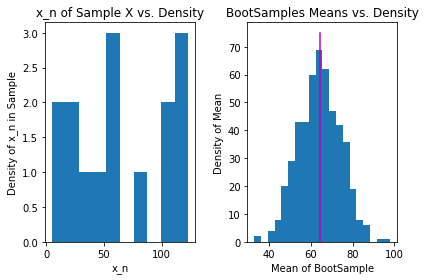

In [ ]:
#Plot Histogram of Sample Data
plt.subplot(1,2,1)
plt.hist(SampleData)
plt.xlabel('x_n')
plt.ylabel("Density of x_n in Sample")
plt.title("x_n of Sample X vs. Density")

#Plot Histogram of Bootsamples's x_n
plt.subplot(1,2,2)
plt.hist(BootInventory, bins=20)
plt.xlabel('Mean of BootSample')
plt.ylabel("Density of Mean")
plt.title("BootSamples Means vs. Density")
#Plot a vertical for mean of 
y_axis = np.linspace(0,75,num=400)
x_axis = np.ones(400)*BootMean
plt.plot(x_axis, y_axis, color='m') 

plt.tight_layout()

As you can see, since the bootstrapping method assumes a normal population, even if the same data is random, the hsitogram of means of Bootsamples approaches a normal distribution. This is similar to a type 1 error, of mistaking data that demonstrates normality when in reality the population is not normal. For each of these histograms, the Mean of Bootsample's Means is about the average of the range of Random values declared above. 

###Statistics With Sample from Population with Normal Parameter
SampleData is defined as 15(size) random integers selected from the normal distribution characterised by a 'mean' (loc) and a 'standard deviation' (scale).

In [ ]:
NormSampleData = np.random.normal(100,50,30) #np.random.normal(loc,scale,size)
print("Standard Mean is: %.2f"% np.mean(NormSampleData)) 
print("Standard Deviation is: %.2f"% np.std(NormSampleData))

Standard Mean is: 100.28
Standard Deviation is: 54.99


Create a histogram of the sample data

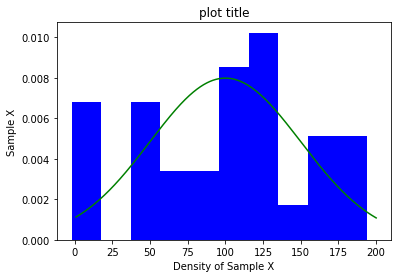

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.linspace(1,200,num=4000)
plt.plot(x_axis, norm.pdf(x_axis, 100, 50), color='g') #Plot a normal curve on chart
plt.hist(NormSampleData, density='True', color='b')[2] #plot sample data probability density histogram
plt.xlabel("Density of Sample X")
plt.ylabel("Sample X")
plt.title("plot title")

## legend add if required
plt.show()

## plt.plot(xvals, yvals) --> suppose we are plotting (xi, yi) pts then xvals is all xis and yvals is all yis
## ytest = norm.pdf(x_axis, 100, 50)
## print(ytest)
## print(len(ytest))

Estimate and print bootstrapped variance and mean

In [ ]:
np.random.seed(1244)
mu, std, BootInvt, BootMeans = FindBootMean(NormSampleData)
print("Bootstrapped Mean is: %.2f"% mu)
print("Bootstrapped Standard Deviation is: %.2f"% std)

Bootstrapped Mean is: 100.08
Bootstrapped Standard Deviation is: 53.57


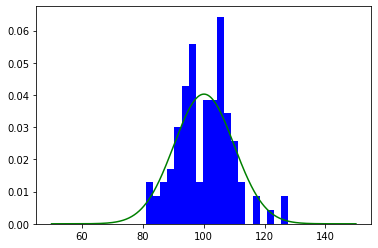

In [ ]:
BootMuInventory1 = np.array(FindBootMean(NormSampleData,100)[3]).flatten()
meansSTD = np.std(BootMeans)
meansMU = np.mean(BootMeans)
plt.hist(BootMuInventory1, bins=20, density='True', color='b')[2]
x_axis = np.linspace(50,150,num=4000)
plt.plot(x_axis, norm.pdf(x_axis, meansMU, meansSTD), color='g')
plt.show()

In [ ]:
BootMuInventory2 = np.array(FindBootMean(NormSampleData)[3]).flatten()
x_axis = np.linspace(50,150,num=4000)

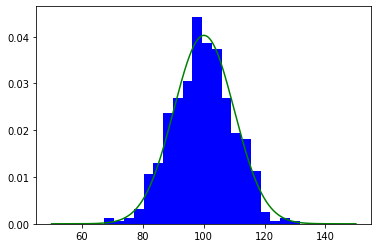

In [ ]:
plt.hist(BootMuInventory2, bins=20, density='True', color='b')[2]
plt.plot(x_axis, norm.pdf(x_axis, meansMU, meansSTD), color='g')
plt.show()

In [ ]:
BootMuInventory3 = np.array(FindBootMean(NormSampleData, 10000)[3]).flatten()

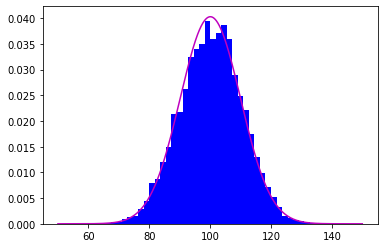

In [ ]:
plt.plot(x_axis, norm.pdf(x_axis,meansMU, meansSTD), color='m') #Plot a normal curve on chart
plt.hist(BootMuInventory3, bins=40, density='True', color='b')[2]
plt.show()

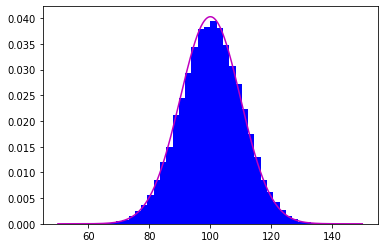

In [ ]:
BootMuInventory4 = np.array(FindBootMean(NormSampleData, 50000)[3]).flatten()
plt.plot(x_axis, norm.pdf(x_axis, meansMU, meansSTD), color='m') #Plot a normal curve on chart
plt.hist(BootMuInventory4, bins=40, density='True', color='b')[2]
plt.show()